In [488]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from datetime import datetime
import pandas as pd

In [468]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [469]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Station = Base.classes.stations
Measurement = Base.classes.measurements
session = Session(engine)

In [470]:
Station.__table__
Measurement.__table__

Table('measurements', MetaData(bind=None), Column('id', INTEGER(), table=<measurements>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurements>), Column('date', TEXT(), table=<measurements>), Column('prcp', INTEGER(), table=<measurements>), Column('tobs', INTEGER(), table=<measurements>), schema=None)

In [471]:
#testing out to see if session is functioning
#session.query(Measurement.date).filter(Measurement.date > '2010-01-01', Measurement.date < '2010-01-14').order_by(Measurement.date).all()

In [472]:
results_date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-01', Measurement.date < '2017-08-23').order_by(Measurement.date).group_by(Measurement.date).all()

In [494]:
#print(results_date_prcp)

In [474]:
surfsup_date = [str(result[0]) for result in results_date_prcp[:50]]
surfsup_prcp = [float(result[1]) for result in results_date_prcp[:50]]

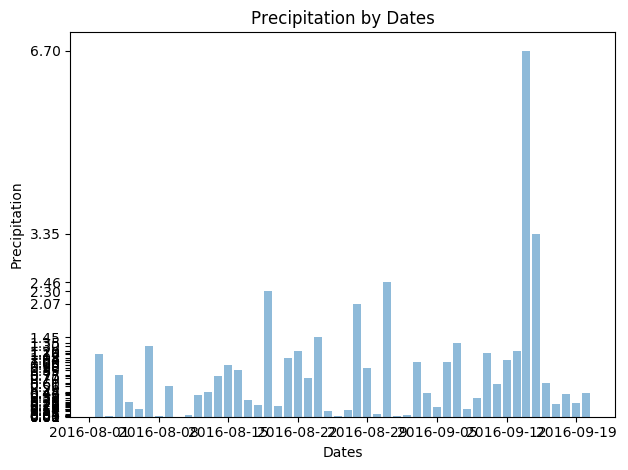

In [475]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

datetime_surfsup_date = [datetime.strptime(date, '%Y-%m-%d') for date in surfsup_date]

fig, ax=plt.subplots()
x_axis = datetime_surfsup_date
y_axis = surfsup_prcp
ax.set_xlabel("Dates")
ax.set_ylabel("Precipitation")
ax.set_yticks(y_axis)
ax.set_title("Precipitation by Dates")

plt.bar(x_axis, y_axis, alpha=0.5)
fig.tight_layout()
plt.show()

In [476]:
df_date_prcp = pd.DataFrame(results_date_prcp, columns=['Dates', 'Precipitation'])
df_date_prcp.set_index('Dates', inplace=True)
df_date_prcp.head(10)

,Precipitation
Dates,
2016-08-02,1.14
2016-08-03,0.01
2016-08-04,0.77
2016-08-05,0.27
2016-08-06,0.14
2016-08-07,1.30
2016-08-08,0.02
2016-08-09,0.56
2016-08-10,0.00


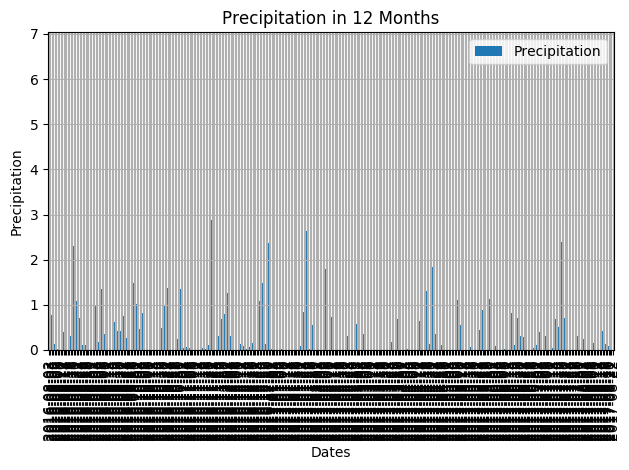

In [477]:
df_date_prcp.iloc[::1].plot.bar(
    title="Precipitation in 12 Months"
)
plt.ylabel('Precipitation')
plt.tight_layout()
plt.locator_params(tight=True)
plt.grid()
plt.show()

In [394]:
data_prcp_stmt = session.query(Measurement).\
    filter(Measurement.date > '2016-08-01', Measurement.date < '2017-08-23').order_by(Measurement.prcp).statement
df_date_prcp2 = pd.read_sql_query(data_prcp_stmt, session.bind)
df_date_prcp2.head(10)

,id,station,date,prcp,tobs
0,2307,USC00519397,2016-08-03,0.0,80
1,2310,USC00519397,2016-08-06,0.0,80
2,2313,USC00519397,2016-08-09,0.0,80
3,2314,USC00519397,2016-08-10,0.0,80
4,2315,USC00519397,2016-08-11,0.0,80
5,2316,USC00519397,2016-08-12,0.0,79
6,2317,USC00519397,2016-08-13,0.0,79
7,2318,USC00519397,2016-08-14,0.0,79
8,2319,USC00519397,2016-08-15,0.0,79
9,2320,USC00519397,2016-08-16,0.0,80


In [400]:
#Unique Station Total
results_unique_station_total = session.query(func.count(Station.station)).scalar()
print(results_station_total)

18103


In [407]:
#Number of Each Station Instance
results_instance_station_total = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()
    
print(results_instance_station_total)

[('USC00511918', 1932), ('USC00513117', 2696), ('USC00514830', 1937), ('USC00516128', 2484), ('USC00517948', 683), ('USC00518838', 342), ('USC00519281', 2772), ('USC00519397', 2685), ('USC00519523', 2572)]


In [423]:
df_count_stations = pd.DataFrame(data=results_instance_station_total, columns=["station","total"])
df_count_stations.sort_values("total", ascending=False)
#Station USC00519281 has the highest amount of observations

,station,total
6,USC00519281,2772
1,USC00513117,2696
7,USC00519397,2685
8,USC00519523,2572
3,USC00516128,2484
2,USC00514830,1937
0,USC00511918,1932
4,USC00517948,683
5,USC00518838,342


In [495]:
results_high_tobs_station = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.station)).\
    filter(Measurement.tobs >=60).group_by(Measurement.station).all()
    
results_high_tobs_station
#greatest number of high tobs is USC00519281

[('USC00511918', 64, 1903),
 ('USC00513117', 77, 2695),
 ('USC00514830', 82, 1935),
 ('USC00516128', 76, 2476),
 ('USC00517948', 80, 682),
 ('USC00518838', 74, 340),
 ('USC00519281', 79, 2750),
 ('USC00519397', 81, 2677),
 ('USC00519523', 82, 2564)]

In [508]:
results_high_tobs_year = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281', Measurement.date >= '2016-08-01', Measurement.date <= '2017-08-23').all()
results_high_tobs_years

[('USC00519281', '2016-08-01', 76),
 ('USC00519281', '2016-08-02', 76),
 ('USC00519281', '2016-08-03', 77),
 ('USC00519281', '2016-08-04', 77),
 ('USC00519281', '2016-08-05', 81),
 ('USC00519281', '2016-08-06', 78),
 ('USC00519281', '2016-08-07', 78),
 ('USC00519281', '2016-08-08', 81),
 ('USC00519281', '2016-08-09', 81),
 ('USC00519281', '2016-08-10', 82),
 ('USC00519281', '2016-08-11', 80),
 ('USC00519281', '2016-08-12', 76),
 ('USC00519281', '2016-08-13', 80),
 ('USC00519281', '2016-08-14', 76),
 ('USC00519281', '2016-08-15', 75),
 ('USC00519281', '2016-08-16', 74),
 ('USC00519281', '2016-08-17', 82),
 ('USC00519281', '2016-08-18', 80),
 ('USC00519281', '2016-08-19', 79),
 ('USC00519281', '2016-08-20', 81),
 ('USC00519281', '2016-08-21', 79),
 ('USC00519281', '2016-08-22', 78),
 ('USC00519281', '2016-08-23', 77),
 ('USC00519281', '2016-08-24', 77),
 ('USC00519281', '2016-08-25', 80),
 ('USC00519281', '2016-08-26', 80),
 ('USC00519281', '2016-08-27', 75),
 ('USC00519281', '2016-08-28

In [509]:
result_tobs = [int(result[2]) for result in results_high_tobs_year]

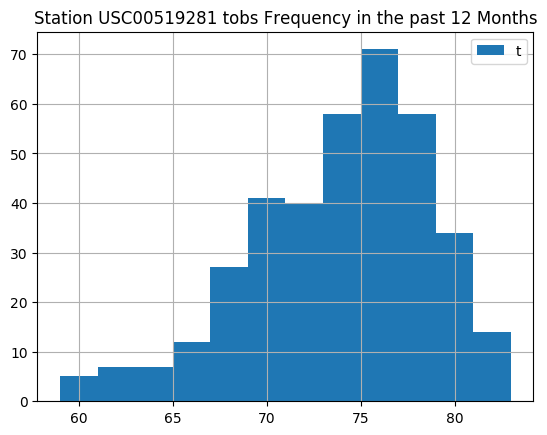

In [521]:
plt.hist(result_tobs, bins=12)
plt.title("Station USC00519281 tobs Frequency in the past 12 Months")
plt.legend("tobs")
plt.grid()
plt.show()

In [653]:
def calc_temps(start, end):
    
    results_temp = session.query(Measurement.date, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start, Measurement.date <= end).all()
    
    return results_temp

61


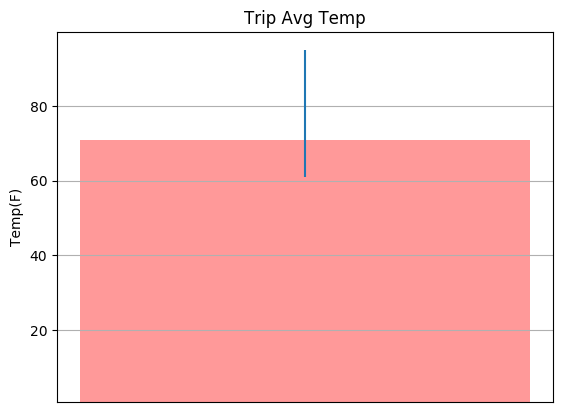

In [733]:
vacation_temps = calc_temps('2016-01-15', '2016-01-30')
vacation_tuple = vacation_temps[0]
min_temp = vacation_tuple[1]
max_temp = vacation_tuple[2]
avg_temp = vacation_tuple[3]
peak_value = max_temp - min_temp

print(min_temp)

plt.bar(min_temp, height = avg_temp, align='center', color = 'red', alpha=0.4, bottom = 1, width = .01)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(F)")
plt.errorbar(min_temp, max_temp,yerr=peak_value)
plt.xticks(np.arange(0,1))
plt.grid()
plt.show()